In [1]:
from google.colab import files


uploaded = files.upload()


Saving predictions.csv to predictions.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['predictions.csv']))
print(df)


     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [4]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['test.csv']))
print(df)


     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [5]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
print(df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_final = pd.read_csv('predictions.csv')
data1_final = data_final.copy()

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.shape

(891, 12)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
data = data.drop(columns = 'Cabin', axis = 1)

In [15]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [16]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [17]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


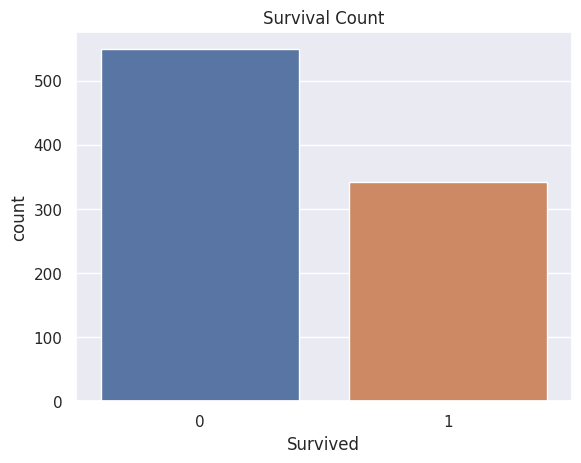

In [19]:
sns.set()
sns.countplot(x = 'Survived', data = data)
plt.title('Survival Count')
plt.show()

In [20]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

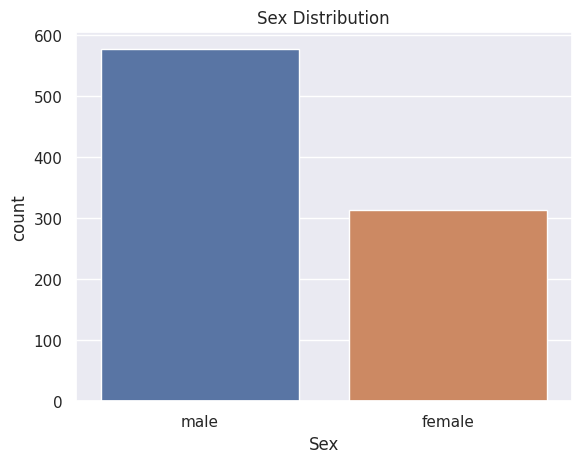

In [21]:
sns.countplot(x = 'Sex', data = data)
plt.title('Sex Distribution')
plt.show()

In [22]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

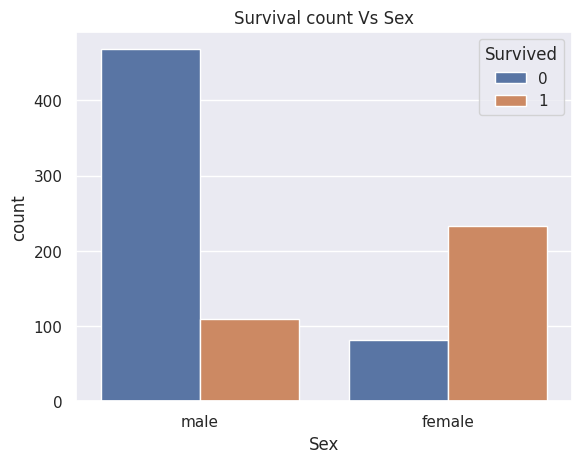

In [23]:
sns.countplot(x = 'Sex', hue = 'Survived', data = data)
plt.title('Survival count Vs Sex')
plt.show()

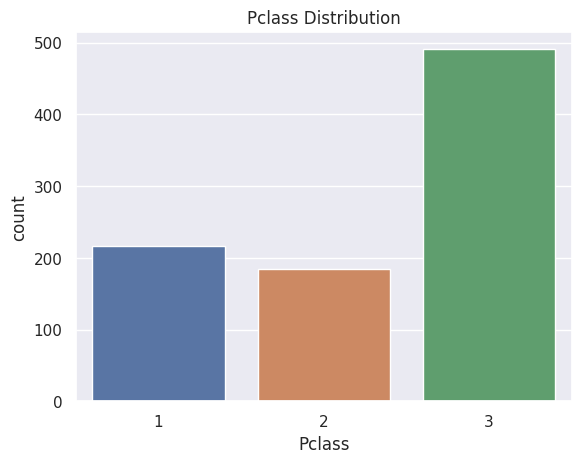

In [24]:
sns.countplot(x = 'Pclass', data = data)
plt.title('Pclass Distribution')
plt.show()

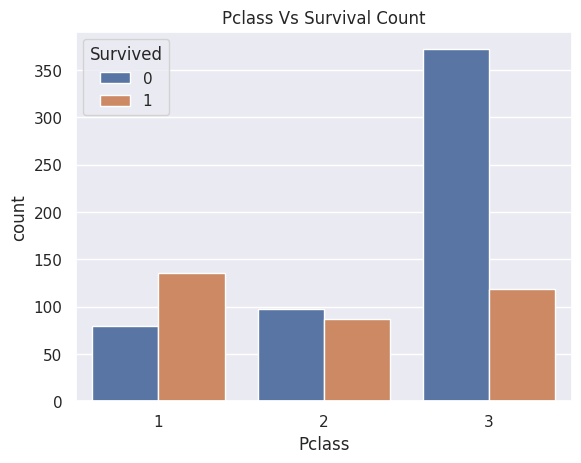

In [25]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = data)
plt.title('Pclass Vs Survival Count')
plt.show()

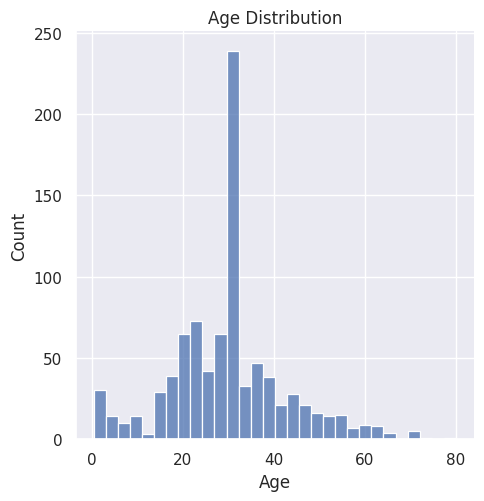

In [26]:
sns.displot(data['Age'])
plt.title('Age Distribution')
plt.show()

In [27]:
data.drop(columns = ['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)

In [28]:
data.replace({'Sex': {'male': 1, 'female': 0}, 'Embarked' : {'S' : 1, 'C' : 2, 'Q' : 3}}, inplace = True)

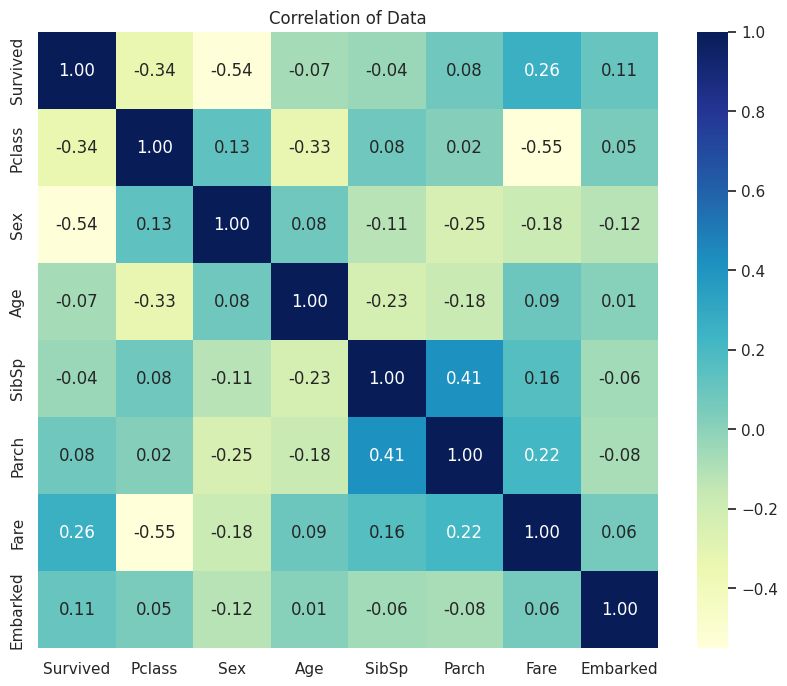

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu',fmt='.2f')
plt.title('Correlation of Data')
plt.show()

In [30]:
X = data.drop('Survived', axis = 1)
Y = data['Survived']

# Setting the ratio for train-test split (i.e. 80% for training, 20% for testing)
train_ratio = 0.8

# Calculate the number of samples for training
num_train_samples = int(train_ratio * len(data))

# Shuffling the indices, this is to ensure that the data is randomly distributed, which results in less bias
indices = np.random.permutation(len(data))

# Splitting the data and labels based on the shuffled indices
x_train = X.iloc[indices[:num_train_samples]]
y_train = Y.iloc[indices[:num_train_samples]]
x_test = X.iloc[indices[num_train_samples:]]
y_test = Y.iloc[indices[num_train_samples:]]

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(712, 7) (179, 7)
(712,) (179,)


In [31]:
class_probabilities = {}
unique_classes = np.unique(y_train)
for class_value in unique_classes:
    class_probabilities[class_value] = len(y_train[y_train == class_value]) / len(y_train)

# Calculate mean and standard deviation for each feature per class

feature_stats = {}
for class_value in unique_classes:
    feature_stats[class_value] = {}    #This is for the individual class values (i.e for class_value = 0)
    for feature in x_train.columns:    #This loop is for accessing all the features in the x_train
        feature_stats[class_value][feature] = {
            #Calculates the mean and standard deviation based on the
            #filteration on each features according to the class_value

            'mean': x_train.loc[y_train == class_value, feature].mean(),
            'std': x_train.loc[y_train == class_value, feature].std()
        }

# Function to calculate probability density function (PDF) of a given value
def calculate_pdf(x, mean, std):
    exponent = np.exp(-((x - mean) ** 2 / (2 * std ** 2)))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

# Predict the class for a given instance
def predict(instance):
    probabilities = {}
    for class_value in unique_classes:
        probabilities[class_value] = class_probabilities[class_value]
        for feature in instance.index:
            probabilities[class_value] *= calculate_pdf(instance[feature], feature_stats[class_value][feature]['mean'],
                                                       feature_stats[class_value][feature]['std'])
    return max(probabilities, key=probabilities.get)

# Make predictions on the test set
predictions = []
for _, instance in x_test.iterrows(): #Avoids the indices and only takes the values over each iteration
    predictions.append(predict(instance))

# Evaluate the model
accuracy = np.sum(predictions == y_test) / len(y_test)
print('Accuracy:', accuracy)

Accuracy: 0.7932960893854749


In [32]:
data_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [33]:
data_test.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1, inplace = True)

In [34]:
data_test.replace({'Sex' : {'male' : 1, 'female' : 0}, 'Embarked' : {'S' : 1, 'C' : 2, 'Q' : 3}}, inplace = True)

In [35]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [36]:
predictions_test = []
for _, instance in data_test.iterrows(): #Avoids the indices and only takes the values over each iteration
    predictions_test.append(predict(instance))

In [37]:
print(predictions_test)

[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 

In [38]:
data_final.drop('PassengerId', axis = 1, inplace = True)

In [39]:
data_final = data_final.squeeze().values # To store the values in the array format.
print(data_final)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [40]:
accuracy = np.sum(predictions_test == data_final) / len(data_final)
print('Accuracy:', accuracy)

Accuracy: 0.8636363636363636


In [41]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# K-Nearest Neighbors algorithm
def knn(x_train, y_train, x_test, k):
    y_pred = []
    for test_point in x_test.values:
        distances = []
        for train_point in x_train.values:
            distance = euclidean_distance(test_point, train_point)
            distances.append(distance)
        sorted_indices = np.argsort(distances) # It returns the indices of the distances list after sorting it.
        k_nearest_indices = sorted_indices[:k] #The first k indices are selected to get the indices of the k nearest neighbors.
        k_nearest_labels = y_train.iloc[k_nearest_indices] #Maps the indices to the corresponding labels from the y_train
        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True) #Returns the unique values and it's elements count
        predicted_label = unique_labels[np.argmax(counts)] #Selects the label with the highest count
        y_pred.append(predicted_label)
    return np.array(y_pred)

# Set the value of k (number of neighbors)
k = 3

# Make predictions using KNN algorithm
y_pred = knn(x_train, y_train, x_test, k)

# Evaluate the model
accuracy_knn = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8636363636363636


In [42]:
print(y_pred)

[1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1]


In [43]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [44]:
data1_final.drop('PassengerId', axis = 1, inplace = True)

In [45]:
num_of_samples = int(0.8 * len(data_test))
indices = np.random.permutation(len(data_test))
x1_train = data_test.iloc[indices[:num_of_samples]]
x1_test = data_test.iloc[indices[num_of_samples:]]
y1_train = data1_final.iloc[indices[:num_of_samples]]
y1_test = data1_final.iloc[indices[num_of_samples:]]
print(x1_train.shape, x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(334, 7) (84, 7)
(334, 1)
(84, 1)


In [46]:
k = 3
y_pred_test = knn(x1_train, y1_train, x1_test, k)

y1_test = y1_test.squeeze().values
accuracy_test = np.sum(y_pred_test == y1_test) / len(y1_test)
print("Accuracy:", accuracy_test)

Accuracy: 0.5238095238095238


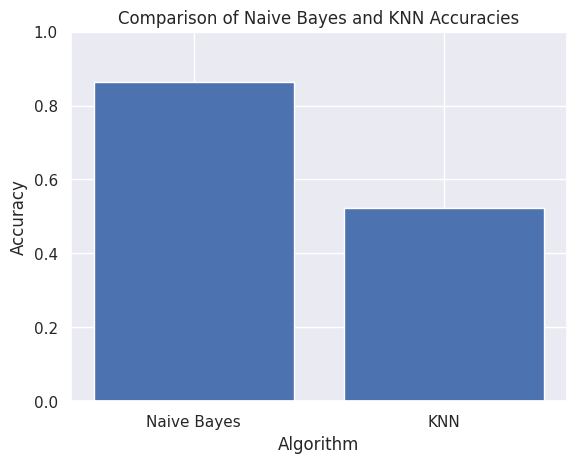

In [47]:
naive_bayes_accuracy = accuracy
knn_accuracy = accuracy_test


plt.bar(['Naive Bayes', 'KNN'], [naive_bayes_accuracy, knn_accuracy])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Naive Bayes and KNN Accuracies')
plt.ylim(0, 1)  # Set the y-axis limits to ensure proper visualization of accuracy values
plt.show()